<a href="https://colab.research.google.com/github/randolphwanjiru/DSP3461/blob/main/Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed.
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

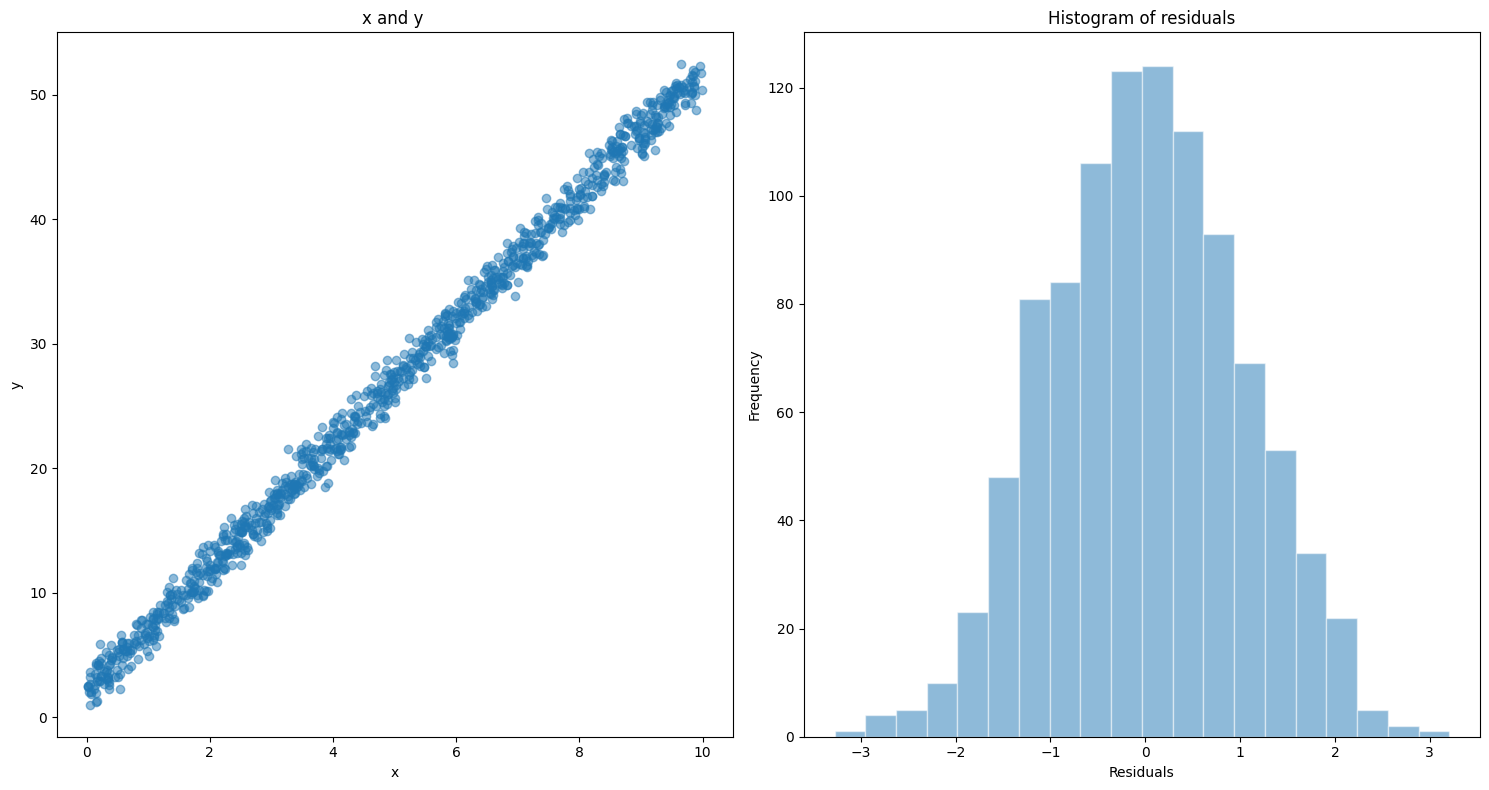

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed
np.random.seed(50)

# Parameters
w = 5  # slope
b = 2   # intercept
n = 1000 # number of examples predetermined in question

#  x values
x = np.random.uniform(0, 10, n)

# Generate noise
noise = np.random.normal(0, 1, n)

# Generate y values
y = w * x + b + noise

# Calculate y - (wx + b) to plot the distribution of residuals
residuals = y - (w * x + b)

# Plot x vs y
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.scatter(x, y, alpha=0.5)
plt.title("x and y ")
plt.xlabel("x")
plt.ylabel("y")

# histogram of residuals plot
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.5, edgecolor='white')
plt.title("Histogram of residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [3]:


#loops
def model_loop(x, w, b):
  result = []
  for xi in x:
        result.append(w * xi + b)
  return result

#numpy
def model_np(x, w, b):
    return w * x + b


x_sample_data = np.random.uniform(0, 2, 10)

#Parameters
w =5
b= 1

# Outputs
y_loop = model_loop(x_sample_data, w, b)
y_np = model_np(x_sample_data, w, b)

# Check
identical_output = np.allclose(y_loop, y_np)

y_loop, y_np, identical_output


([10.118990728947447,
  10.974158286502112,
  5.597233745257103,
  10.340666161642408,
  1.4971007718373,
  1.4122416266017603,
  6.957581707794244,
  8.412515250014875,
  7.182164975218419,
  3.515447922787728],
 array([10.11899073, 10.97415829,  5.59723375, 10.34066616,  1.49710077,
         1.41224163,  6.95758171,  8.41251525,  7.18216498,  3.51544792]),
 True)

3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

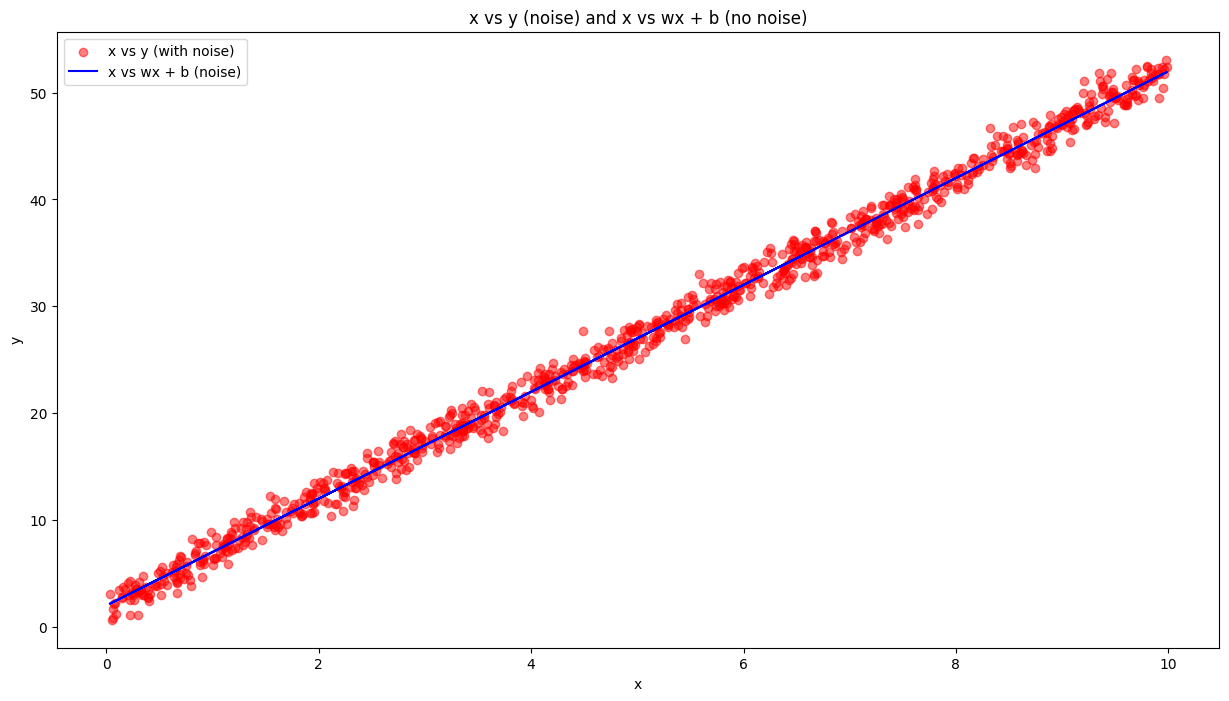

In [4]:

# same parameters as question 1
w=5
b=2
n=1000
# Sample data
x = np.random.uniform(0, 10, n)

# y with noise (same as before in question 1)
noise = np.random.normal(0, 1, n)
y = w * x + b + noise

# y without noise (wx + b)
y_no_noise = model_np(x, w, b)

# Plot x vs y (with noise) and x vs y_no_noise (without noise)
plt.figure(figsize=(15, 8))

# Plot x vs y (with noise)
plt.scatter(x, y, alpha=0.5, label='x vs y (with noise)', color='red')

# Plot x vs wx + b (without noise)
plt.plot(x, y_no_noise, color='blue', label='x vs wx + b (noise)')

plt.title("x vs y (noise) and x vs wx + b (no noise)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant.
   * Plot the cost vs $b$ for the dataset, holding $w$ constant.


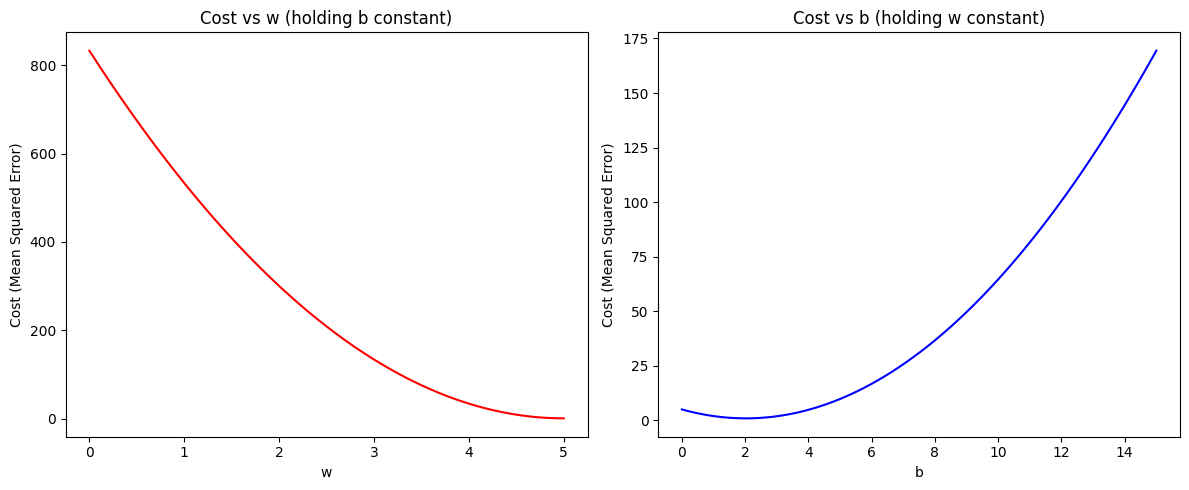

In [5]:
#function for calculating the mean squared error (the cost function)
def cost(x, y, w, b):
    y_pred = w * x + b
    return np.mean((y - y_pred) ** 2)

# sample data (same as before)
w_true =5
b_true = 2
n = 1000
x = np.random.uniform(0, 10, n)
noise = np.random.normal(0, 1, n)
y = w_true * x + b_true + noise

# Generate costs by varying w note **note **(keeping b constant)
w_values = np.linspace(0, 5, 100)
costs_w = [cost(x, y, w, b_true) for w in w_values]

# Generate costs by varying b ** note **(keeping w constant)
b_values = np.linspace(0, 15, 100)
costs_b = [cost(x, y, w_true, b) for b in b_values]

# Plot cost vs w (with b constant)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w_values, costs_w, color='red')
plt.title("Cost vs w (holding b constant)")
plt.xlabel("w")
plt.ylabel("Cost (Mean Squared Error)")

# Plot cost vs b (with w constant)
plt.subplot(1, 2, 2)
plt.plot(b_values, costs_b, color='blue')
plt.title("Cost vs b (holding w constant)")
plt.xlabel("b")
plt.ylabel("Cost (Mean Squared Error)")

plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant.
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant.

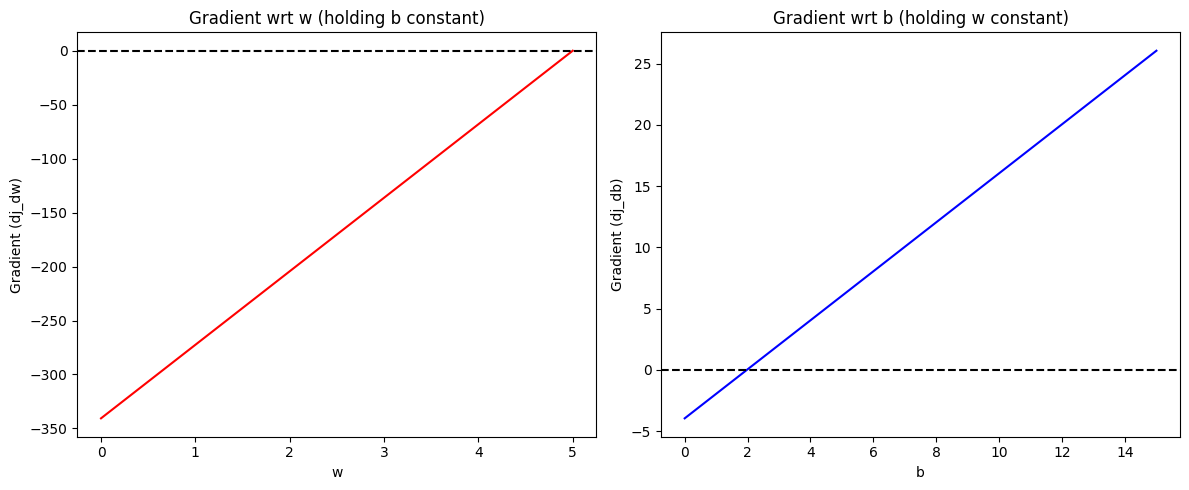

In [6]:


#  compute the gradient of the cost function with respect to w and b
def gradient(x, y, w, b):
    m = 1000  # Number of data points
    y_pred = w * x + b
    error = y_pred - y

    # Gradient with respect to w
    dj_dw = (2 / m) * np.dot(error, x)

    # Gradient with respect to b
    dj_db = (2 / m) * np.sum(error)

    return dj_dw, dj_db

# Parameters (same as before)
w_true, b_true = 5, 2
n = 1000
x = np.random.uniform(0, 10, n)
noise = np.random.normal(0, 1, n)
y = w_true * x + b_true + noise

# Generate gradients by varying w (keeping b constant)
w_values = np.linspace(0, 5, 100)
grads_w = [gradient(x, y, w, b_true)[0] for w in w_values]

# Generate gradients by varying b (keeping w constant)
b_values = np.linspace(0, 15, 100)
grads_b = [gradient(x, y, w_true, b)[1] for b in b_values]

# Plotting the gradient vs w (with b constant)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w_values, grads_w, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Gradient wrt w (holding b constant)")
plt.xlabel("w")
plt.ylabel("Gradient (dj_dw)")

# Plotting the gradient vs b (with w constant)
plt.subplot(1, 2, 2)
plt.plot(b_values, grads_b, color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Gradient wrt b (holding w constant)")
plt.xlabel("b")
plt.ylabel("Gradient (dj_db)")

plt.tight_layout()
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`.

In [7]:
import copy
import math

# Gradient Descent function
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []

    b = b_in
    w = w_in

    for i in range(num_iters):
        # Compute the gradient
        dj_dw, dj_db = gradient(x, y, w, b)

        # Update parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Store cost and parameters
        if i < 100000:
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])

        # Print progress every 10% of iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

# Initial values
w_init = 0
b_init = 0
alpha = 0.001
num_iters = 100000

# Gradient descent call
weight_final, bias_final, cost_history, param_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Final weights and bias
print(f"Final weight: {weight_final}, Final bias: {bias_final}")


Iteration    0: Cost 8.29e+02  dj_dw: -3.611e+02, dj_db: -5.485e+01   w:  3.611e-01, b: 5.48451e-02
Iteration 10000: Cost 9.01e-01  dj_dw:  7.730e-04, dj_db: -5.144e-03   w:  5.000e+00, b: 1.97768e+00
Iteration 20000: Cost 9.01e-01  dj_dw:  6.983e-06, dj_db: -4.647e-05   w:  4.998e+00, b: 1.98850e+00
Iteration 30000: Cost 9.01e-01  dj_dw:  6.307e-08, dj_db: -4.197e-07   w:  4.998e+00, b: 1.98860e+00
Iteration 40000: Cost 9.01e-01  dj_dw:  5.697e-10, dj_db: -3.791e-09   w:  4.998e+00, b: 1.98860e+00
Iteration 50000: Cost 9.01e-01  dj_dw:  5.072e-12, dj_db: -3.428e-11   w:  4.998e+00, b: 1.98860e+00
Iteration 60000: Cost 9.01e-01  dj_dw:  4.215e-13, dj_db: -3.017e-13   w:  4.998e+00, b: 1.98860e+00
Iteration 70000: Cost 9.01e-01  dj_dw:  4.394e-13, dj_db: -1.085e-13   w:  4.998e+00, b: 1.98860e+00
Iteration 80000: Cost 9.01e-01  dj_dw:  4.394e-13, dj_db: -1.085e-13   w:  4.998e+00, b: 1.98860e+00
Iteration 90000: Cost 9.01e-01  dj_dw:  4.394e-13, dj_db: -1.085e-13   w:  4.998e+00, b: 1.9

7. Plot the cost and parameters versus iteration of gradient descent.

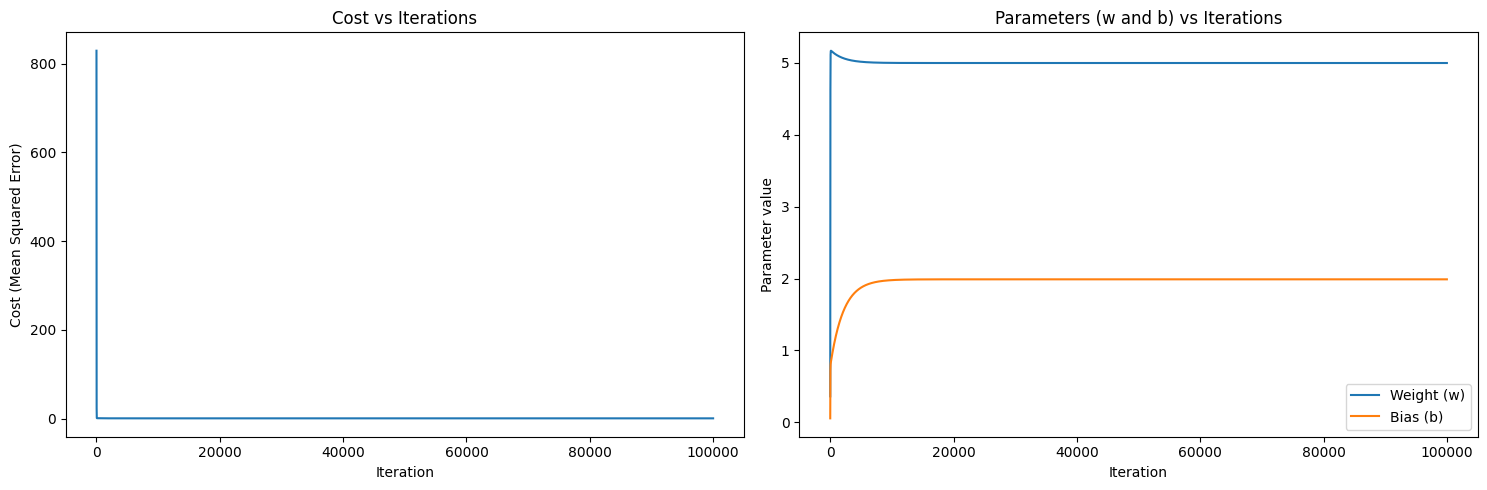

In [8]:
# cost and parameter history
cost_history = np.array(cost_history)
param_history = np.array(param_history)

# Plotting the cost versus iteration
plt.figure(figsize=(15, 5))

# Cost vs Iterations
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (Mean Squared Error)")

# Parameters vs Iterations (w and b)
plt.subplot(1, 2, 2)
plt.plot(param_history[:, 0], label='Weight (w)')
plt.plot(param_history[:, 1], label='Bias (b)')
plt.title("Parameters (w and b) vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.legend()

plt.tight_layout()
plt.show()

